In [1]:
import pandas as pd
import numpy as np
from statsmodels.stats.proportion import proportions_ztest
import seaborn as sns
import matplotlib.pyplot as plt


plt.style.use('dark_background')


Manager Vine Day claims that 80% clients are happy with the booze. We asked 100 people and 75 are happy. What can we conlcude from this?

In [2]:
#Lets assume that 'happines' is 80 %. What is the probabiltiy of getting 75 and lower percents if we have 100 sample of people

np.random.binomial(1,0.8,size=100) #we generated 100 people where people are happy in 80 %

array([1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0])

In [3]:
np.mean([np.random.binomial(1,0.8,size=100).mean()  <= 0.75 for _ in range(100000)])

0.13036

So we don't have enough evidence to kick his theory

H0 - happines of people is 80%
H1 - happines is less that 80%


p-value is never equally to someting but always more or less


Bootstrat is the same as monte carlo

In [4]:
proportions_ztest(75,100,value = 0.8,alternative='smaller')

(-1.1547005383792526, 0.12410653949496159)

<AxesSubplot: ylabel='Count'>

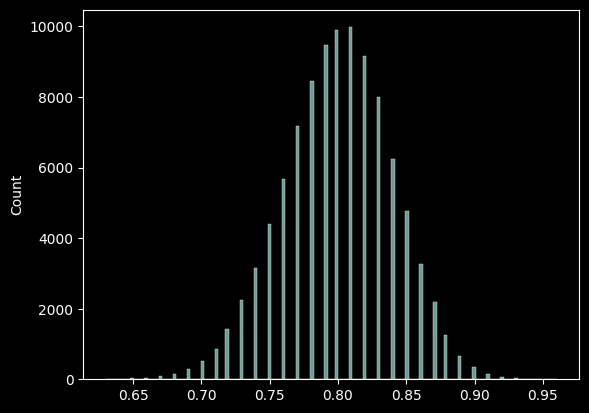

In [5]:
sns.histplot([np.random.binomial(1,0.8,size=100).mean() for _ in range(100000)])

p value is like sqare on the graph, its like 12 % of the whole figure

Conversion on landing page is 10 %

We will show new landing page only to 30% of clients

In [6]:
df = pd.DataFrame({'group':['old landing(A)','new landing (B)'],
                  'lead':[700,300],'sale':[70,48]})

In [7]:
df

,group,lead,sale
0,old landing(A),700,70
1,new landing (B),300,48


In [8]:
df['cr'] = df['sale']/df['lead']

In [9]:
df

,group,lead,sale,cr
0,old landing(A),700,70,0.10
1,new landing (B),300,48,0.16


Lets assume that there is no real difference. Whats the probabilit of getting such or even higher difference assuming there is no diference?

In [10]:
(70+48)/1000

0.118

In [11]:
np.random.binomial(1,0.118,size=700).mean() #this is generator for our null hypothesis

0.11857142857142858

In [12]:
abs(np.random.binomial(1,0.118,size=300).mean()-np.random.binomial(1,0.118,size=700).mean())

0.010952380952380963

In [13]:
abs(0.1-0.16)

0.06

In [14]:

np.mean([abs(np.random.binomial(1,0.118,size=300).mean()-np.random.binomial(1,0.118,size=700).mean()) >= 0.06 for _ in range(100000)])

0.00696

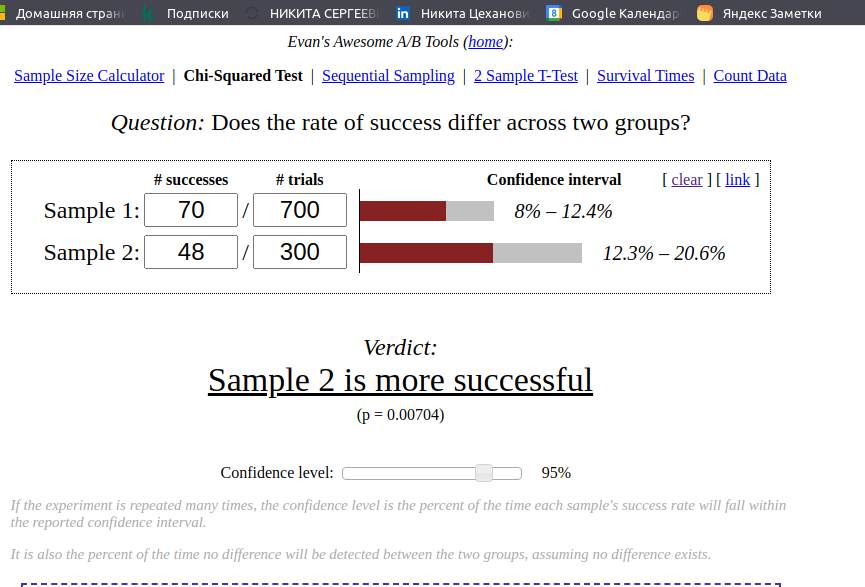
https://www.evanmiller.org/ab-testing/chi-squared.html

In [15]:
proportions_ztest([70,48],[700,300])

(-2.695166510284625, 0.007035346384355496)

In [16]:
proportions_ztest([70,48],[700,300])

(-2.695166510284625, 0.007035346384355496)

In [31]:
from tqdm import tqdm

In [41]:
n = 1000
result = []
for _ in (range(n)):
  a = np.random.binomial(1,0.118,size=700)
  b = np.random.binomial(1,0.118,size=300)
  diff = abs(a.mean() - b.mean())
  # null_hyp_prob = np.concatenate([a,b]).mean()
  pval = np.mean([abs(np.random.binomial(1,0.118,size=300).mean()
             -np.random.binomial(1,0.118,size=700).mean())
         >= diff for _ in range(1000)])
  result.append(pval)

<AxesSubplot: >

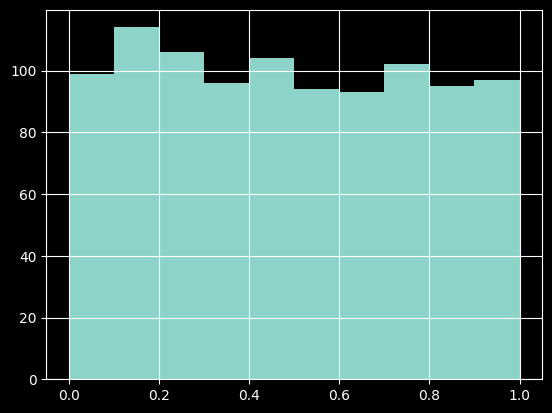

In [42]:
pd.Series(result).hist()

In [46]:
(np.array(result) <0.05).mean()

0.046

In [48]:
df=pd.DataFrame(np.random.normal(size=1000))

array([[<AxesSubplot: title={'center': '0'}>]], dtype=object)

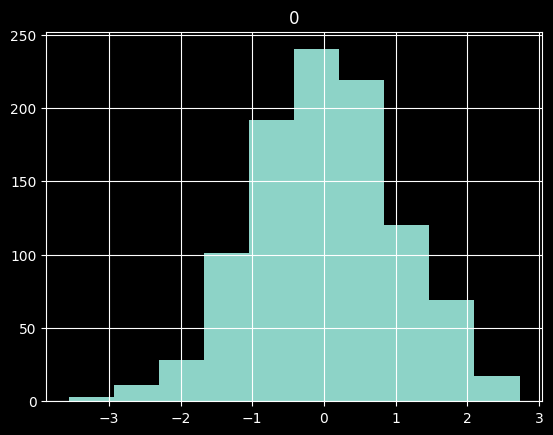

In [49]:
df.hist()

In [53]:
df=df.sort_values(0)

In [54]:
df['cnt'] = range(1,1001)

In [55]:
df['pct']=df['cnt']/1000

In [56]:
df

,0,cnt,pct
147,-3.561620,1,0.001
617,-3.308855,2,0.002
587,-2.949875,3,0.003
458,-2.806050,4,0.004
889,-2.779864,5,0.005
...,...,...,...
382,2.462598,996,0.996
482,2.469598,997,0.997
206,2.642759,998,0.998
367,2.711405,999,0.999


<AxesSubplot: >

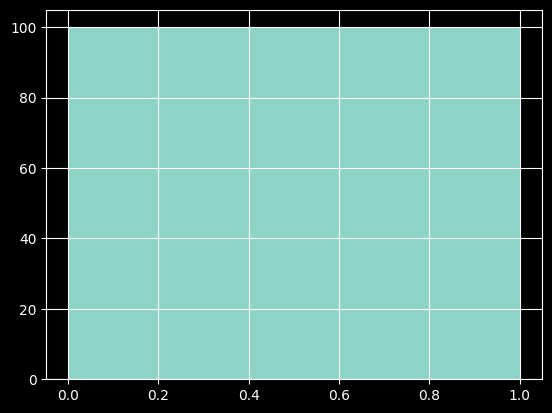

In [57]:
df['pct'].hist()

In [58]:
df['bin'] = pd.cut(df['pct'],10)

In [59]:
df.groupby('bin')['pct'].count()

bin
(1e-06, 0.101]    100
(0.101, 0.201]    100
(0.201, 0.301]    100
(0.301, 0.401]    100
(0.401, 0.5]      100
(0.5, 0.6]        100
(0.6, 0.7]        100
(0.7, 0.8]        100
(0.8, 0.9]        100
(0.9, 1.0]        100
Name: pct, dtype: int64

Force is connected with mistake of 2nd gender . It is 1 - FN 


Recall is force, or TPR



In [80]:
n = 1000
result = []
for _ in tqdm(range(n)):
  a = np.random.binomial(1,0.10,size=700)
  b = np.random.binomial(1,0.12,size=300)
  diff = abs(a.mean() - b.mean())
  null_hyp_prob = np.concatenate([a,b]).mean()
  pval = np.mean([abs(np.random.binomial(1,null_hyp_prob,size=300).mean() 
  - np.random.binomial(1,null_hyp_prob,size=700).mean()) >= diff for _ in range(1000)])
  result.append(pval)


100%|███████████████████████████████████████| 1000/1000 [00:25<00:00, 39.81it/s]


<AxesSubplot: >

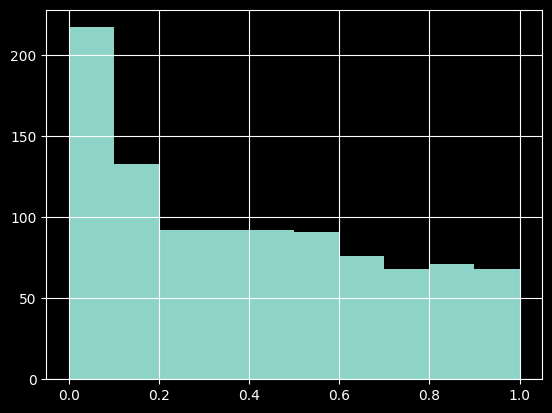

In [64]:
pd.Series(result).hist()

In [66]:
(pd.Series(result) <0.05).mean() #this is statisitcal power we shoyl deie about st power before experiment

0.134

https://www.evanmiller.org/ab-testing/sample-size.html
 # Experiment design

In [67]:
n = 1000
result = []
for _ in (range(n)):
  a = np.random.binomial(1,0.10,size=700)
  b = np.random.binomial(1,0.15,size=300)
  diff = abs(a.mean() - b.mean())
  # null_hyp_prob = np.concatenate([a,b]).mean()
  pval = np.mean([abs(np.random.binomial(1,0.118,size=300).mean()
             -np.random.binomial(1,0.118,size=700).mean())
         >= diff for _ in range(1000)])
  result.append(pval)

<AxesSubplot: >

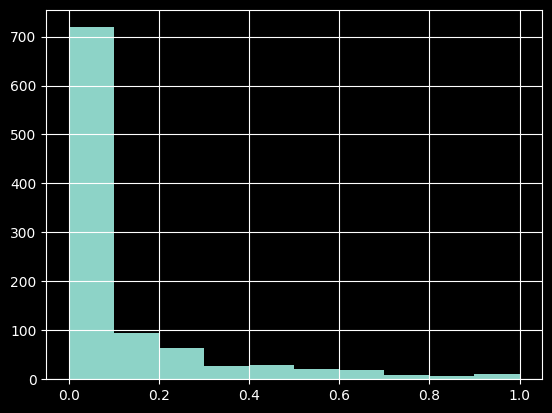

In [68]:
pd.Series(result).hist()

In [69]:
(pd.Series(result)<0.05).mean()

0.612

In [71]:
import statsmodels.stats.api as sms
es = sms.proportion_effectsize(0.10, 0.15)
sms.NormalIndPower().solve_power(es, power=0.8, alpha=0.05, ratio=1)

680.3526619127882

In [77]:
n = 1000
result = []
for _ in (range(n)):
  a = np.random.binomial(1,0.10,size=680)
  b = np.random.binomial(1,0.15,size=680)
  # diff = abs(a.mean() - b.mean())
  # null_hyp_prob = np.concatenate([a,b]).mean()
  _, pval = proportions_ztest([a.sum(),b.sum()],[len(a),len(b)])
  result.append(pval)

<AxesSubplot: >

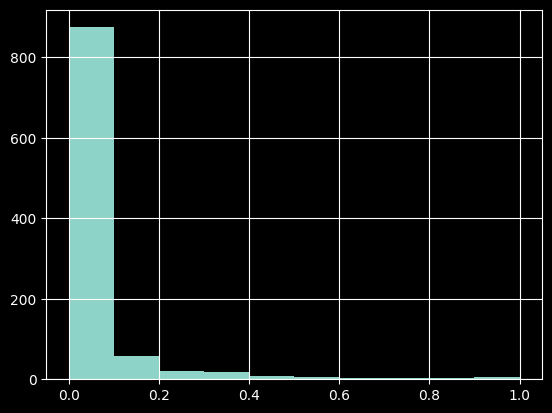

In [78]:
pd.Series(result).hist()

In [79]:
(pd.Series(result)<0.05).mean()

0.789

There should be 727 people in bigger group